In [1]:
## Path for modules

import sys

import numpy as np
import xarray as xr

from netCDF4 import Dataset

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

import matplotlib.cm as mplcm
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import date, datetime
from xhistogram.xarray import histogram

import pandas as pd

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
## Dataset

dirfilt_00 = "/mnt/meom/workdir/henelle/eNATL60/eNATL60-BLB002-S/1h/ACO/"
dirfilt_T0 = "/mnt/meom/workdir/henelle/eNATL60/eNATL60-BLBT02-S/1h/ACO/"

In [3]:
## All files, JAS

tfile_JAS_strain00 = dirfilt_00 + 'eNATL60ACO-BLB002_y2009*.1h_strain10m.nc'
tfile_JAS_strainT0 = dirfilt_T0 + 'eNATL60ACO-BLBT02_y2009*.1h_strain10m.nc'
tfile_JAS_curl00   = dirfilt_00 + 'eNATL60ACO-BLB002_y2009*.1h_curl10m.nc'
tfile_JAS_curlT0   = dirfilt_T0 + 'eNATL60ACO-BLBT02_y2009*.1h_curl10m.nc'

In [4]:
ds_JAS_strain00 = xr.merge([xr.open_mfdataset(tfile_JAS_strain00,combine='by_coords')])
ds_JAS_strainT0 = xr.merge([xr.open_mfdataset(tfile_JAS_strainT0,combine='by_coords')])
ds_JAS_curl00   = xr.merge([xr.open_mfdataset(tfile_JAS_curl00,  combine='by_coords')])
ds_JAS_curlT0   = xr.merge([xr.open_mfdataset(tfile_JAS_curlT0,  combine='by_coords')])
#ds_JAS_strain00

In [5]:
navlon = ds_JAS_strain00.nav_lon[0,:,:]
navlat = ds_JAS_strain00.nav_lat[0,:,:]

In [6]:
print(navlon.shape)
print(navlat.shape)

(1191, 781)
(1191, 781)


## Selecting box

box    = (-31.5,-27,30.6,36)
domain = (box[0] < navlon)*(navlon < box[1])*(box[2] < navlat)*(navlat < box[3])
where  = np.where(domain)

lats = navlat[where]
lons = navlon[where]
print(len(lats))
print(len(lons))

ind  = np.unravel_index(np.argmin(lats, axis=None), lats.shape)
jmin = where[0][ind[0]]
ind  = np.unravel_index(np.argmax(lats, axis=None), lats.shape)
jmax = where[0][ind[0]]
ind  = np.unravel_index(np.argmin(lons, axis=None), lons.shape)
imin = where[1][ind[0]]
ind  = np.unravel_index(np.argmax(lons, axis=None), lons.shape)
imax = where[1][ind[0]]

print('jmin = '+str(jmin)+'; jmax = '+str(jmax))
print('imin = '+str(imin)+'; imax = '+str(imax))

In [7]:
sbins = np.arange(0.0,0.5, 0.025)
cbins = np.arange(-0.5,0.5, 0.025)

In [8]:
now_hist = datetime.now()
current_time_hist = now_hist.strftime("%H:%M:%S")
print("Current Time, before histograms =", current_time_hist)

Current Time, before histograms = 11:58:30


In [9]:
hist_JAS_strain00 = histogram(ds_JAS_strain00.sostrainoverf,bins=[sbins])
hist_JAS_strainT0 = histogram(ds_JAS_strainT0.sostrainoverf,bins=[sbins])
hist_JAS_curl00   = histogram(ds_JAS_curl00.socurloverf,bins=[cbins])
hist_JAS_curlT0   = histogram(ds_JAS_curlT0.socurloverf,bins=[cbins])

In [10]:
now_start_plot = datetime.now()
current_time_start_plot = now_start_plot.strftime("%H:%M:%S")
print("Current Time, before plotting =", current_time_start_plot)

Current Time, before plotting = 11:58:30


Text(0.5, 1.2, 'JAS')

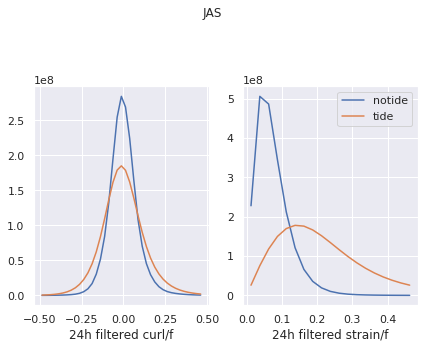

In [13]:
fig, axes = plt.subplots(ncols=2)

hist_JAS_curl00.plot(ax=axes[0],label='no tide')
hist_JAS_curlT0.plot(ax=axes[0],label='tide')
axes[0].set_xlabel('24h filtered curl/f')
axes[0].set_ylabel('')


hist_JAS_strain00.plot(ax=axes[1],label='notide')
hist_JAS_strainT0.plot(ax=axes[1],label='tide')
axes[1].set_xlabel('24h filtered strain/f')
axes[1].set_ylabel('')


plt.tight_layout()
plt.draw()
plt.legend()
plt.suptitle('JAS',y=1.1)

In [12]:
now_end_plot = datetime.now()
current_time_end_plot = now_end_plot.strftime("%H:%M:%S")
print("Current Time, after plotting =", current_time_end_plot)

Current Time, after plotting = 12:02:34
